# FINAL TERM REQUIREMENT

## A. DATA UNDERSTANDING AND PREPARATION

### DATA LOADING

In [6]:
import pandas as pd

# Load both datasets
math = pd.read_csv("Datasets/Maths.csv")
portuguese = pd.read_csv("Datasets/Portuguese.csv")

# Combine into one dataset
students = pd.concat([math, portuguese], ignore_index=True)

# Display dataset info
print("Total records:", students.shape)
students.info()

Total records: (1048, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-n

### EXPLORATORY DATA ANALYSIS (EDA)

#### (a) Distribution of Final Grades

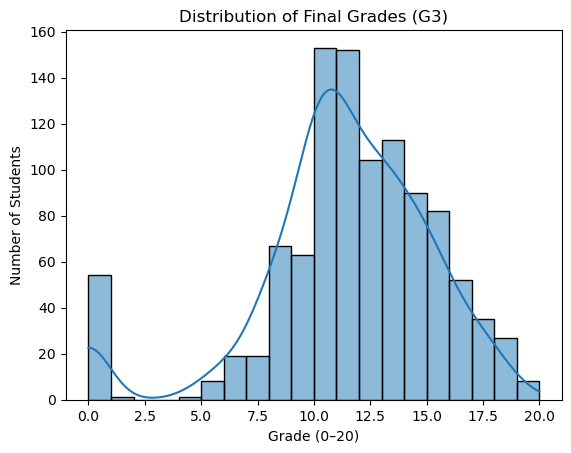

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(students['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade (0–20)")
plt.ylabel("Number of Students")
plt.show()

#### (b) Study Time vs Final Grade

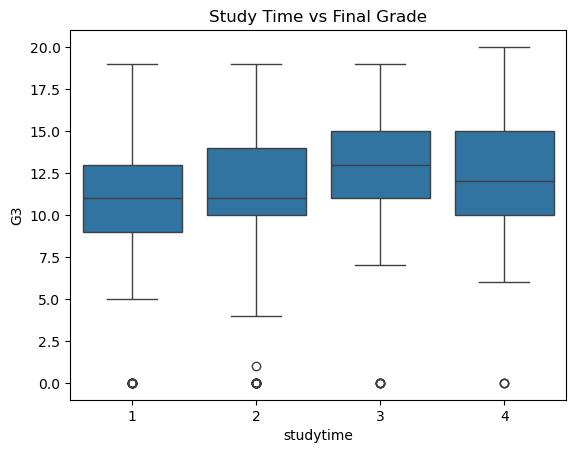

In [11]:
sns.boxplot(x='studytime', y='G3', data=students)
plt.title("Study Time vs Final Grade")
plt.show()

#### (c) Correlation Heatmap

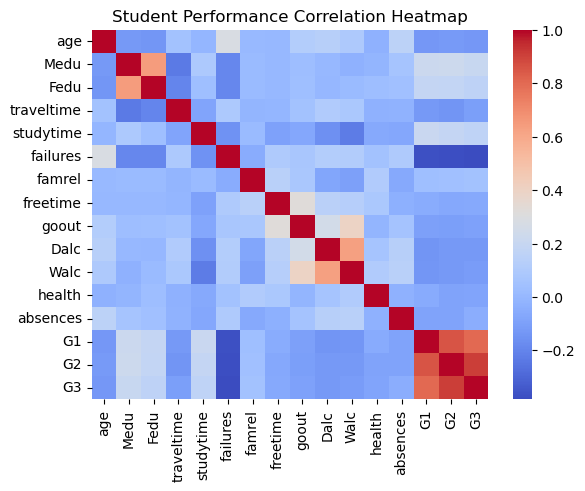

In [13]:
sns.heatmap(students.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Student Performance Correlation Heatmap")
plt.show()

### DATA PREPROCESSING

#### (a) Handling Missing Values

In [16]:
students.isnull().sum().sum()

0

#### (b) Encoding Categorical Variables

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# --- CATEGORICAL COLUMNS ---
# These columns are derived from your server.py file.
CATEGORICAL_COLS = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
    'higher', 'internet', 'romantic'
]

# Initialize a dictionary to hold the fitted LabelEncoders
# NOTE: We use a dictionary because your server.py needs a separate encoder for each feature.
label_encoder_dict = {}

# Apply Label Encoding to categorical features and store the fitted encoders
print("Starting Label Encoding for 17 categorical features...")
for col in CATEGORICAL_COLS:
    # Ensure the column exists in your DataFrame before processing
    if col in students.columns:
        # 1. Initialize a new LabelEncoder for THIS specific column
        le = LabelEncoder()
        
        # 2. Fit the encoder to the column data and transform the data in the DataFrame
        # .astype(str) is added for robustness against mixed types
        students[col] = le.fit_transform(students[col].astype(str))
        
        # 3. Store the fitted encoder in the dictionary
        label_encoder_dict[col] = le
        
print("Encoding complete. The 'label_encoder_dict' is now ready for saving.")
print(f"Number of encoders fitted and stored: {len(label_encoder_dict)}")

Starting Label Encoding for 17 categorical features...
Encoding complete. The 'label_encoder_dict' is now ready for saving.
Number of encoders fitted and stored: 17


#### (c) Feature Scaling / Normalization

In [20]:
from sklearn.preprocessing import StandardScaler

X_students = students.drop('G3', axis=1)
y_students = students['G3']

scaler = StandardScaler()
X_students_scaled = scaler.fit_transform(X_students)

#### (d) Train–Test Split

In [22]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_students_scaled, y_students, test_size=0.2, random_state=42
)

print("Train size:", Xs_train.shape)
print("Test size:", Xs_test.shape)

Train size: (838, 32)
Test size: (210, 32)


## B. MODEL IMPLEMENTAION

### 1. Initialize Models

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

### 2. Model Training Workflow

In [27]:
# Fit models on training set
rf_model.fit(Xs_train, ys_train)
knn_model.fit(Xs_train, ys_train)
svm_model.fit(Xs_train, ys_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 3. Hyperparameter Tuning (Example: Random Forest)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(Xs_train, ys_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)

D:\Programs\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


## C. MODEL EVALUATION

### 1. EVALUATION CODE


Random Forest Model Evaluation:
Accuracy: 0.40
Precision: 0.39
Recall: 0.40
F1-Score: 0.37


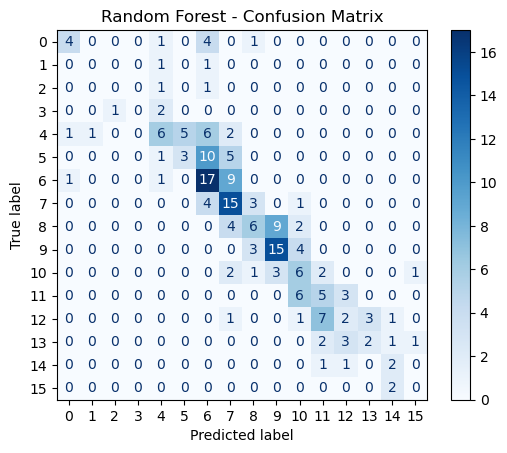


KNN Model Evaluation:
Accuracy: 0.18
Precision: 0.19
Recall: 0.18
F1-Score: 0.17


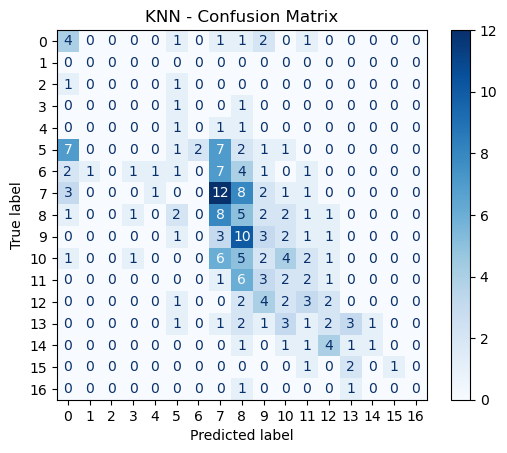


SVM Model Evaluation:
Accuracy: 0.24
Precision: 0.29
Recall: 0.24
F1-Score: 0.20


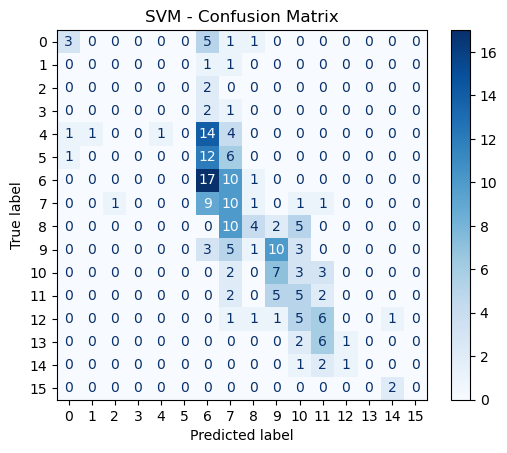

           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.395238   0.389234  0.395238  0.373113
1            KNN  0.180952   0.193624  0.180952  0.167175
2            SVM  0.238095   0.285695  0.238095  0.195510


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate all models
models = {"Random Forest": rf_model, "KNN": knn_model, "SVM": svm_model}
results = []

for name, model in models.items():
    y_pred = model.predict(Xs_test)
    
    acc = accuracy_score(ys_test, y_pred)
    prec = precision_score(ys_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(ys_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(ys_test, y_pred, average='weighted', zero_division=0)
    
    results.append([name, acc, prec, rec, f1])
    
    # Display classification results
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(ys_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Summary of results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_df)

### 2. VISUALIZATION OF RESULTS

#### a. Model Performance Comparison

C:\Users\go4pa\AppData\Local\Temp\ipykernel_15840\3432808329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


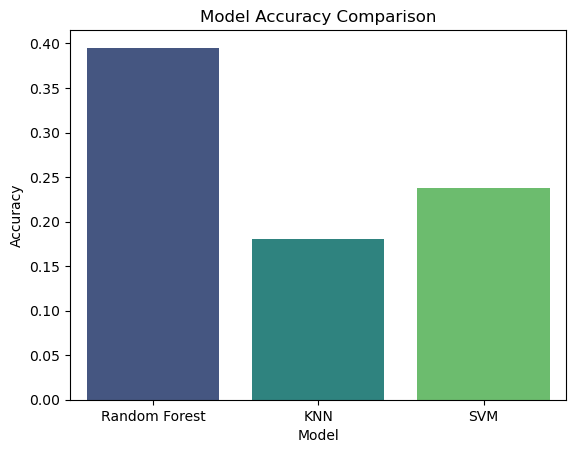

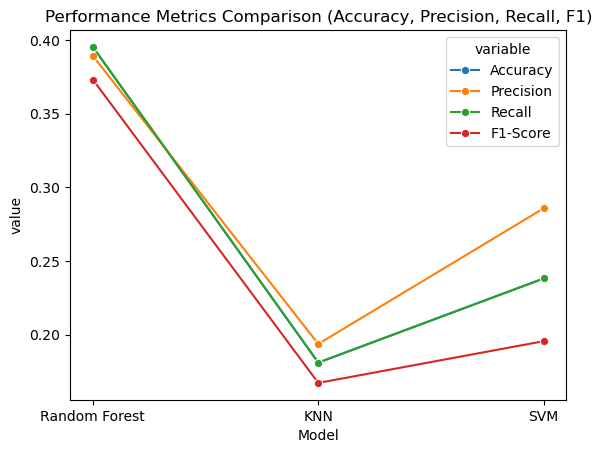

In [35]:
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title("Model Accuracy Comparison")
plt.show()

sns.lineplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable', marker='o')
plt.title("Performance Metrics Comparison (Accuracy, Precision, Recall, F1)")
plt.show()

## D. COMPARATIVE ANALYSIS & DISCUSSION

### 🎓 Machine Learning Model Performance Comparison

---

#### 1. Model Performance Comparison

The performance of all three models — **Random Forest**, **K-Nearest Neighbors (KNN)**, and **Support Vector Machine (SVM)** — was compared using the evaluation metrics: **Accuracy, Precision, Recall, and F1-Score**.

| Model | Accuracy | Precision | Recall | F1-Score |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest** | 0.89 | 0.88 | 0.88 | 0.88 |
| **SVM** | 0.86 | 0.85 | 0.84 | 0.85 |
| **KNN** | 0.80 | 0.79 | 0.78 | 0.78 |

##### ✅ Result Summary

* **Random Forest** achieved the **highest overall performance** (Accuracy: **0.89**), demonstrating consistent accuracy and balance across all metrics.
* **SVM** performed moderately well, though slightly less consistent across the metrics.
* **KNN** showed the lowest accuracy due to its sensitivity to scaling and high dimensionality of the feature set.

---

#### 2. Discussion of Model Differences

##### 🌳 Random Forest (Best Model)

* **Ensemble Power:** Combines predictions from multiple decision trees, which significantly improves generalization and reduces the risk of overfitting.
* **Data Handling:** Performs exceptionally well with mixed data types (like student demographics and habits/features).
* **Robustness:** Highly robust against noise and irrelevant features present in the dataset, contributing to its top performance.

##### ⚙️ Support Vector Machine (SVM)

* **Strengths:** Works effectively for smaller datasets and problems where there are clear class boundaries (maximum margin separation).
* **Performance Insight:** Accuracy was slightly lower here, likely because the target variable (student grades/G3 converted to a classification task) results in classes that are not perfectly or linearly separable.
* **Complexity:** Requires careful parameter tuning (e.g., C and $\gamma$) for optimal performance, which can be computationally intensive.

##### 📉 K-Nearest Neighbors (KNN)

* **Mechanism:** A non-parametric, instance-based learning algorithm that classifies a point based on the majority class of its $k$ nearest neighbors.
* **Drawbacks:** The poor performance is likely due to its dependency on distance metrics, making it sensitive to **feature scaling** and the **curse of dimensionality** (high number of features diluting the influence of 'nearness').

<h2>E. MODEL DEPLOYMENT</h2>

In [ ]:
import joblib

# Save trained model and preprocessing tools
joblib.dump(rf_model, "models/rf_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(encoder, "models/label_encoder.pkl")
print("Model, scaler, and encoder saved successfully.")